# Customer Segmentation for Retail Store

**Goal:**
- Identify distinct customer groups based on age, income, and spending score to help design targeted marketing campaigns.

## 1. Introduction

Customer segmentation allows a retail company to understand customer diversity and tailor marketing strategies.  
We’ll use clustering (K-Means) to group similar customers using the Mall Customers dataset.

## 2. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

sns.set(style="whitegrid")


## 3. Load and Inspect Data

In [3]:
df = pd.read_csv("Mall_Customers.csv")
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Overview 
- 200 customers
- Feature: Gender, Age, Annual Income, Spending Score
Let's check data types and missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum() # Check for missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 4. Data Cleaning

In [ ]:
df = df.drop_duplicates() # Remove duplicate entries
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) # Change categorical to numerical

In [ ]:
df 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


## Exploratory Data Analysis (EDA)
Visualize distribution and relationship to gain intuition.

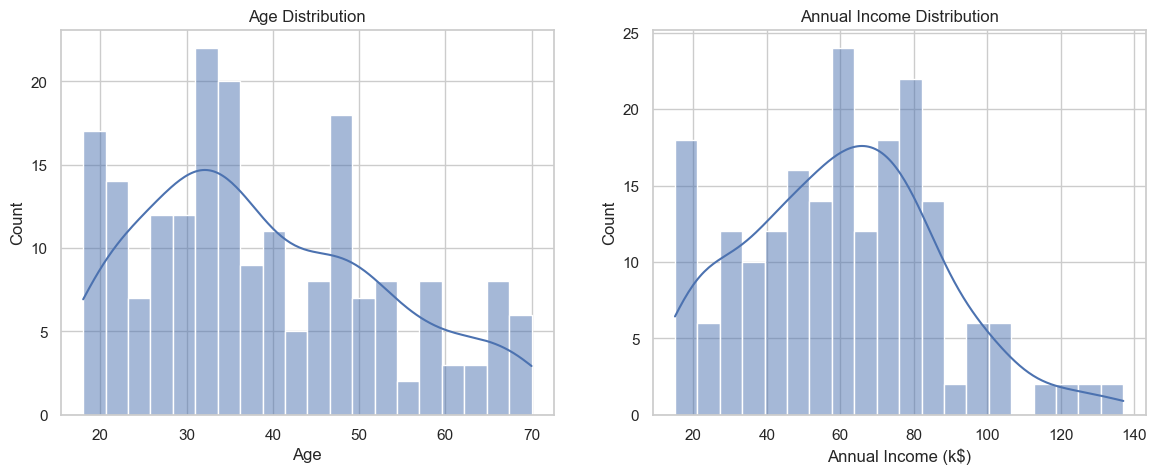

In [9]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.show()

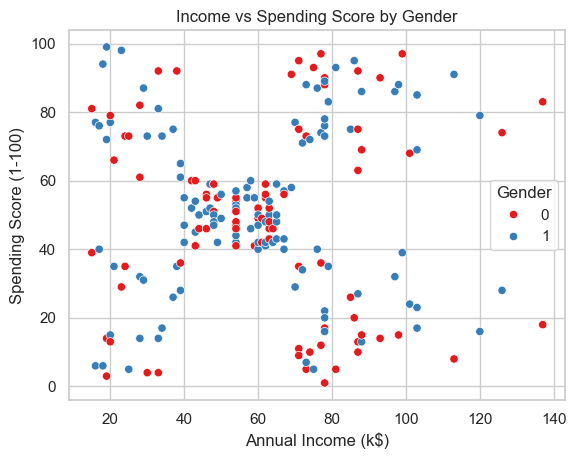

In [10]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='Set1')
plt.title('Income vs Spending Score by Gender')
plt.show()

## 6. Feature Selection and Scaling
numerical features for clustering

In [11]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

## 7. Determine Optimal Number of Clusters (Elbow method)

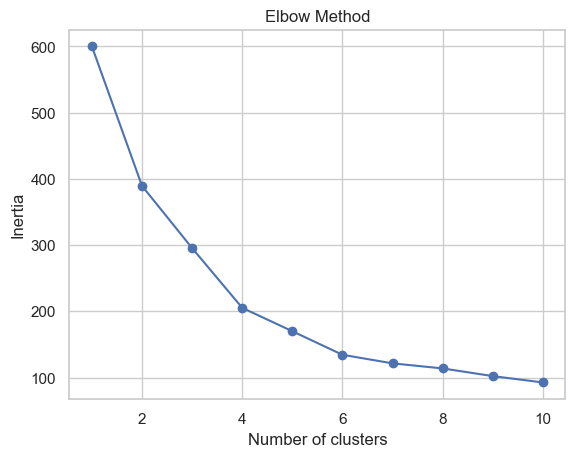

In [13]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

By visual inspection, elbow typically appers aroung **k = 5**



## 8. Apply K-Means Clustering

In [19]:
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score for k=6: {silhouette_avg}')  

Silhouette Score for k=6: 0.43106526216603014


## 9. Visualize Clusters

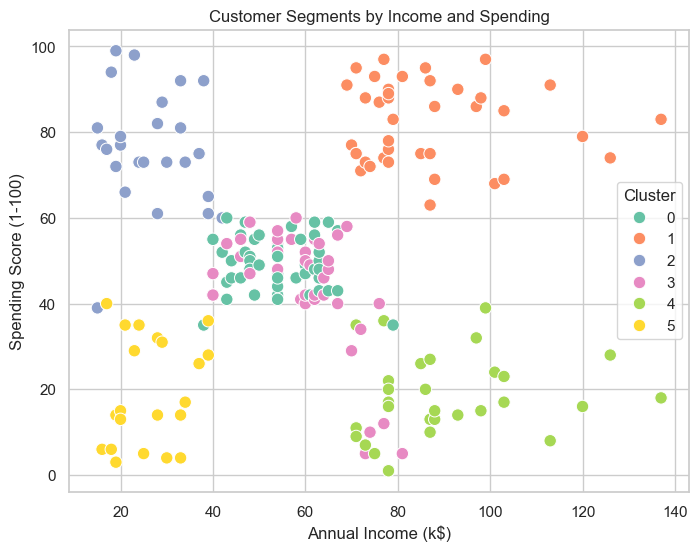

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', data=df, s=80)
plt.title('Customer Segments by Income and Spending')
plt.show()

## 10. Dimensionality Reduction (PCA) for 2D Visualization

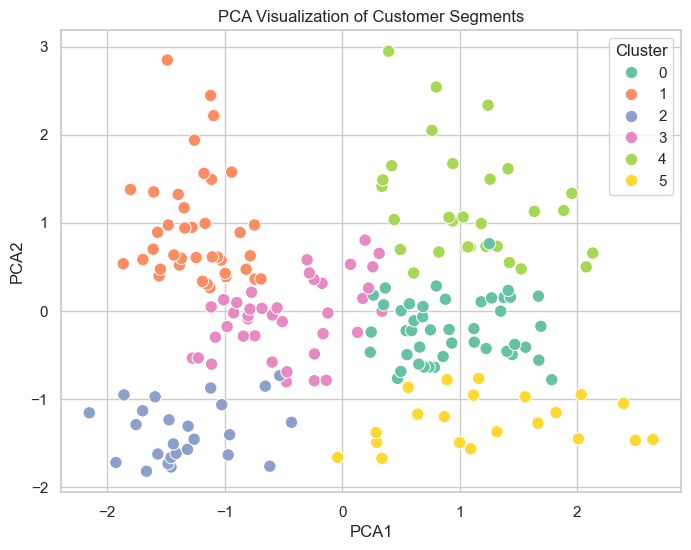

In [21]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)
df['PCA1'] = reduced[:,0]
df['PCA2'] = reduced[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=df, s=80)
plt.title('PCA Visualization of Customer Segments')
plt.show()

## 11. Interpret Clusters (Business Insights)
to analyze mean values of each cluster.

In [22]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.333333,54.266667,49.066667
1,32.692308,86.538462,82.128205
2,25.560000,26.480000,76.240000
3,26.125000,59.425000,44.450000
4,44.000000,90.133333,17.933333
5,45.523810,26.285714,19.380952


### Example Interpretation

| Cluster | Characteristics | Insight / Action |
|----------|-----------------|-----------------|
| 0 | Young (25–35), High Income, High Spending | **"Luxury Shoppers"** — target with premium offers, new product launches |
| 1 | Middle-aged, Average Income, Moderate Spending | **"Balanced Buyers"** — can upsell with loyalty programs |
| 2 | Older, High Income, Low Spending | **"Conservative Spenders"** — focus on trust & service quality |
| 3 | Young, Low Income, High Spending | **"Trendy Youth"** — push affordable trendy collections |
| 4 | Low Income, Low Spending | **"Budget Customers"** — promote discounts & essential goods |

---

## 12. Conclusions

- I identified **5 meaningful customer segments** using K-Means clustering.
- The company can personalize marketing strategies for each segment.
- Future improvements:
  - Add behavioral features (purchase frequency, preferred categories)
  - Apply hierarchical clustering for validation
  - Deploy as an interactive dashboard (next section)